Hi! Here's a tutorial on analyzing data from the rat gambling task

If you have any problems, please email:***

Please run the following cell before continuing.

In [1]:
#MEDPC rat gambling task functions imports, will print "I am being executed!" if functional
import rgt_functions as rgt

#main imports 
import os
import pandas as pd
import numpy as np

# plotting imports 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# stats imports 
import scipy.stats as stats

#the following line prevents pandas from giving unecessary errors 
pd.options.mode.chained_assignment = None

I am being executed!


Check your current working directory by running line 2. 

From your working directory, make a data folder (call it: data), and add your .xlsx file into that folder. 

Change ('C:\\Users\\dexte\\hathaway_1\\data') to your current working directory and add '\\data'

For example, my current working directory is 'C:\\Users\\dexte\\hathaway_1', so I enter 'C:\\Users\\dexte\\hathaway_1\\data' into the brackets (slashes will be different if you are not using windows). 

This saves all data in your data folder, instead of your current working directory. 

In addition, please make sure you have rgt_functions.py in the same directory as your Jupyter notebook (Tutorial_draft.ipynb)***

##default: just have their data in their cwd (easier option)
##future: write a function that will save files in separate folder (for them)

In [2]:
#checks current working directory
os.getcwd()

#changes working directory to whatever is included in brackets
os.chdir('C:\\Users\\dexte\\hathaway_1\\data') 

##Set your variables! These will be used later in the code. Example arguments are left in for clarity.

###Brett will edit

In [3]:
#we need to set a few variables for loading in the data - these will change depending on the dataset

#in file_names (List[str]), add the file names you wish to read into Python 
file_names = ['BH07_raw_free_S29-30.xlsx']

#in group_names (List[str]), add the names of the control and experimental group, respectively 
group_names = ['Tg negative','Tg positive'] 

title = 'Nigrostriatal activation during acquisition' #title for figures, describing the experiment
startsess = 29 #first session in this dataset
endsess = 30 #last session in this dataset

group_names = {0: 'tg negative',
              1: 'tg positive'}

#the following two lines of code assign the rat subject numbers to the experimental and control group lists
exp_group = [1, 2, 7, 8, 11, 12, 16, 19, 20, 21, 22, 25, 26, 29, 32] #Tg positive

control_group = [3, 4, 5, 6, 9, 13, 14, 15, 17, 18, 23, 24, 27, 28, 30, 31] #Tg negative

Time to load your data into Python! 

load_data takes in one argument: file_names 

Recall: file_names is the object assigned to the list of files you want to read into Python. Make sure this is correct! If this is your first run through the code, maybe try loading in just one file. 

load_data outputs a table similar to the excel sheet(s) you loaded in. (in the order established in file_names) 

In [4]:
rgt.load_data(file_names)

df = rgt.load_data(file_names)

#load_data won't output a dataframe itself. Use the following function to view the top of your dataframe. Note: it should look the exact same as your first excel file. 

df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


check_sessions 

check_sessions gives us a summary for each rat (subject) including session numbers, session dates and # trials for each session.

This allows us to see if there are any missing/incorrect session numbers, and if MED-PC exported all of the desired data into the Excel file you loaded in (file_names). 

In [5]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-09  28          53.0
         2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  

drop 

To drop data from a certain session... 

In [6]:
dropped_idx = list(df.loc[df['Session']==28].index)
df.drop(dropped_idx, inplace=True)
df.reset_index(inplace=True) #reset the index so there are no missing numbers 

check_sessions 

Check that you dropped the session desired (in this example, we dropped data from session 28)

In [7]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2020-10-09  29         131.1
         2020-10-10  30         124.0
2        2020-10-09  29          76.1
         2020-10-10  30          81.0
3        2020-10-09  29          49.0
         2020-10-10  30          45.0
4        2020-10-09  29         103.0
         2020-10-10  30          97.0
5        2020-10-09  29          68.1
         2020-10-10  30          69.0
6        2020-10-09  29          88.0
         2020-10-10  30          75.0
7        2020-10-10  29          65.0
         2020-10-13  30          56.1
8        2020-10-09  29         124.0
         2020-10-10  30         121.0
9        2020-10-09  29          62.0
         2020-10-10  30          61.0
11       2020-10-09  29         132.0
         2020-10-10  30         136.1
12       2020-10-09  29          54.0
         2020-10-10  30          72.0
13       2020-10-09  29          67.0
         2020-10-10  30          60.0
14       2020-10-09  29          80.1
         2020-10-10  

get_summary_data

Run the following cell to acquire your data.

The rows represent subjects (rats 1-n)

The columns are explained below:
- ##P# represents the percent choice of each option. For example, 29P1 represents the percentage of times P1 was selected during the 29th session. 
- risk## represents the risk score for each session: (P1 + P2) - (P3 + P4) 
- collect_lat## represents the mean collect latency for each session
- choice_lat## represents the mean choice latency for each session 
- trial## represents the number of trials (not including premature responses or omissions) for each session
- prem## represents the number of premature responses for each session

In [8]:
df_sum = rgt.get_summary_data(df)
df_sum

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0,8.39695,0.763359,83.0645,0,16.9355,0,81.6794,66.129,0.929160,1.058226,0.638321,0.655323,0,0,131.1,124.0,26.404494,24.848485
2,9.33333,65.3333,10.6667,14.6667,4.93827,76.5432,0,18.5185,49.3333,62.963,1.157333,1.010617,1.057733,1.249012,1,0,76.1,81.0,30.275229,33.606557
3,2.17391,8.69565,56.5217,32.6087,0,11.6279,67.4419,20.9302,-78.2609,-76.7442,0.467174,0.549070,2.833261,3.652791,3,2,49.0,45.0,3.921569,6.250000
4,5.88235,73.5294,4.90196,15.6863,13.4021,64.9485,3.09278,18.5567,58.8235,56.701,0.904412,0.817938,1.000980,0.885258,1,0,103.0,97.0,13.445378,24.218750
5,0,1.53846,98.4615,0,9.375,7.8125,79.6875,3.125,-96.9231,-65.625,0.397385,0.618125,3.135846,3.176250,3,5,68.1,69.0,8.108108,16.867470
6,2.5,70,0,27.5,2.94118,63.2353,0,33.8235,45,32.3529,0.739000,0.686618,2.172000,1.859265,8,7,88.0,75.0,9.278351,15.730337
7,3.07692,10.7692,64.6154,21.5385,1.81818,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.439077,0.473273,1.012615,1.194545,0,0,65.0,56.1,16.666667,34.523810
8,2.41935,92.7419,0.806452,4.03226,2.47934,94.2149,1.65289,1.65289,90.3226,93.3884,1.401532,1.353884,1.850484,1.956033,0,0,124.0,121.0,10.144928,12.949640
9,3.27869,3.27869,90.1639,3.27869,5.26316,7.01754,82.4561,5.26316,-86.8852,-75.4386,0.367869,0.349474,2.300328,2.754211,1,4,62.0,61.0,20.512821,11.594203
11,10.687,88.5496,0.763359,0,8.14815,91.1111,0,0.740741,98.4733,98.5185,1.116794,1.246519,1.950153,1.667852,1,0,132.0,136.1,2.222222,7.534247


get_risk_status 

Get the risk status of the rats using the following code. 

In [9]:
df_summary, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess)

print(df_summary[['mean_risk','risk_status']]) ##printed 2 of many columns in df_summary
print(risky, optimal) #prints 2 lists: the subject numbers of the risky rats, and the subject numbers of the optimal rats

    mean_risk  risk_status
1   73.904211          1.0
2   56.148148          1.0
3  -77.502528          2.0
4   57.762280          1.0
5  -81.274038          2.0
6   38.676471          1.0
7  -73.426573          2.0
8   91.855505          1.0
9  -81.161921          2.0
11  98.495900          1.0
12  32.942097          1.0
13 -33.705357          2.0
14  43.214286          1.0
15 -41.344124          2.0
16 -30.296896          2.0
17   0.633446          1.0
18  41.629689          1.0
19   4.054054          1.0
20  91.116505          1.0
21  11.868687          1.0
22  62.978469          1.0
23  75.345912          1.0
24  71.178218          1.0
25 -98.437500          2.0
26  35.270270          1.0
27  44.732745          1.0
28  43.102453          1.0
29 -30.433996          2.0
30  94.573643          1.0
31  80.796731          1.0
32   1.587302          1.0
[3, 5, 7, 9, 13, 15, 16, 25, 29] [1, 2, 4, 6, 8, 11, 12, 14, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32]


export_to_excel

Export your data to an Excel file! 

Note: 'tg_status' is the column name that specifies the control vs. experimental group

Note2: 'BH07_free_S29-30.xlsx' specifies the name of the Excel file

In [10]:
rgt.export_to_excel(df_summary, [control_group, exp_group], 'tg_status', 'BH07_free_S29-30.xlsx')

Plotting functions: 

If you want to plot your data, run the functions below. 

In [11]:
group_names = {0: 'tg negative',
              1: 'tg positive'}

mean_scores, stderror = rgt.get_group_means_sem(df_summary, [control_group, exp_group], group_names)
mean_scores

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,...,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30,mean_risk,risk_status
tg negative,5.74901,50.9906,33.8409,9.41941,7.24256,53.3089,28.8852,10.5634,13.4793,21.1029,...,2.10245,2.07925,3.25,3.5,77.4563,83.0812,14.055,13.637,17.2911,1.3125
tg positive,16.0466,45.0598,21.712,17.1815,14.8991,45.8362,22.0626,17.2021,22.2129,21.4706,...,1.77515,1.82612,1.53333,2.73333,86.56,85.0267,18.3601,20.5969,21.8417,1.26667


rgt_plot

Plotting!

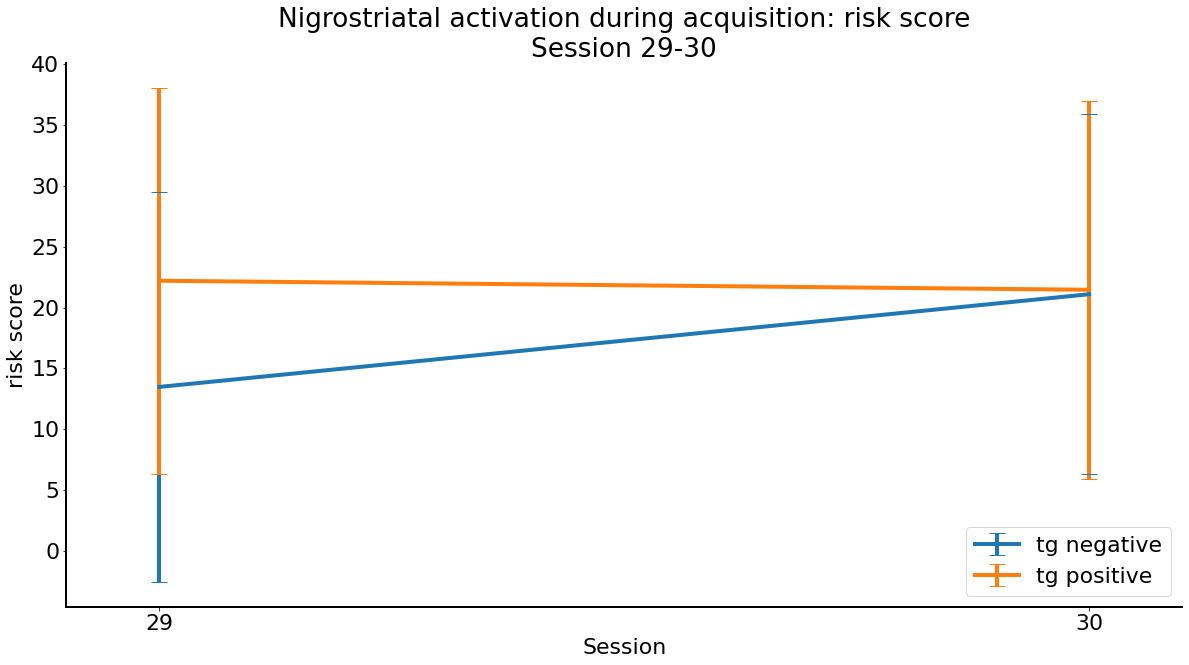

In [12]:
rgt.rgt_plot('risk',startsess,endsess,['tg negative','tg positive'],title,mean_scores,stderror, var_title='risk score')

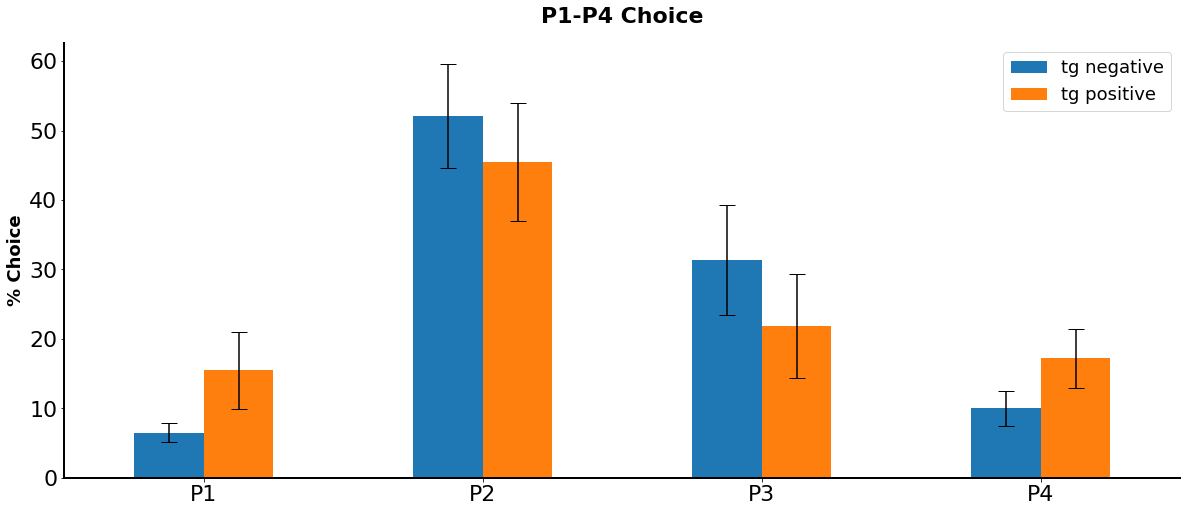

In [13]:
rgt.choice_bar_plot(startsess,endsess,mean_scores,stderror)